In [2]:
import numpy as np, matplotlib.pyplot as plt
import matplotlib as mpl
import corner
import seaborn.apionly as sns
bimport pandas as pd
%matplotlib inline

In [22]:
sns.set_context('notebook')

In [43]:
df = pd.read_csv('results/test_chain_short.csv')
df_accept = pd.read_csv('results/test_accept_short.csv')
df.head()

,logz_0,logdust_0,logNpix_0,logage_0,lnprob_0,logz_1,logdust_1,logNpix_1,logage_1,lnprob_1,...,logz_18,logdust_18,logNpix_18,logage_18,lnprob_18,logz_19,logdust_19,logNpix_19,logage_19,lnprob_19
0,-0.676499,-2.823598,2.680687,-3.685165,-28404.276216,-0.212027,-1.708864,4.005681,0.384415,-29095.214693,...,-0.104104,-1.44985,3.481323,-0.305862,-29042.454327,-0.025091,-1.260218,3.975106,1.273117,-29099.85471


In [17]:
walkers = np.arange(10)
steps = np.arange(len(df))

In [13]:
z = np.array([df['logz_%d'%w].values for w in walkers])
logNpix = np.array([df['logNpix_%d'%w].values for w in walkers])
logdust = np.array([df['logdust_%d'%w].values for w in walkers])
age = np.array([df['logage_%d'%w].values for w in walkers])
lnprob = np.array([df['lnprob_%d'%w].values for w in walkers])

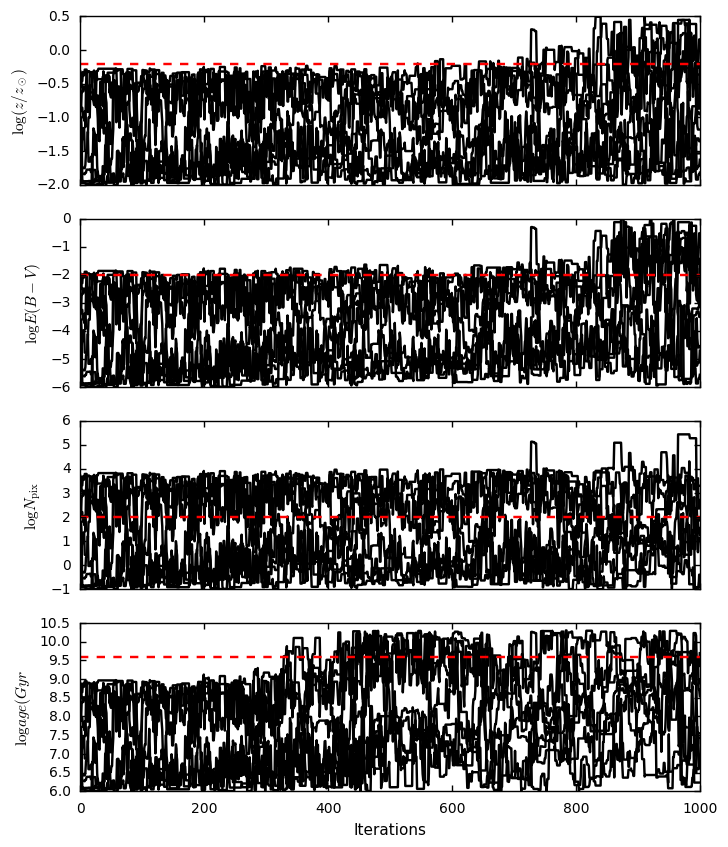

In [24]:
fig, axes = plt.subplots(nrows=4, figsize=(8, 10), sharex=True)
for w in walkers:
    axes[0].plot(steps, z[w], 'k-')
    axes[1].plot(steps, logdust[w], 'k-')
    axes[2].plot(steps, logNpix[w], 'k-')
    axes[3].plot(steps, age[w], 'k-')
axes[0].axhline(y=-0.2, ls='--', color='r')
axes[1].axhline(y=-2., ls='--', color='r')
axes[2].axhline(y=2., ls='--', color='r')
axes[3].axhline(y=9.6, ls='--', color='r')
axes[0].set_ylabel(r'$\log(z / z_\odot)$')
axes[1].set_ylabel(r'$\log E(B-V)$')
axes[2].set_ylabel(r'$\log N_\mathrm{pix}$')
axes[3].set_ylabel(r'$\log age (Gyr$')
axes[3].set_xlabel('Iterations')

In [31]:
params = np.array([z.flatten(), logdust.flatten(), logNpix.flatten(), age.flatten()]).T

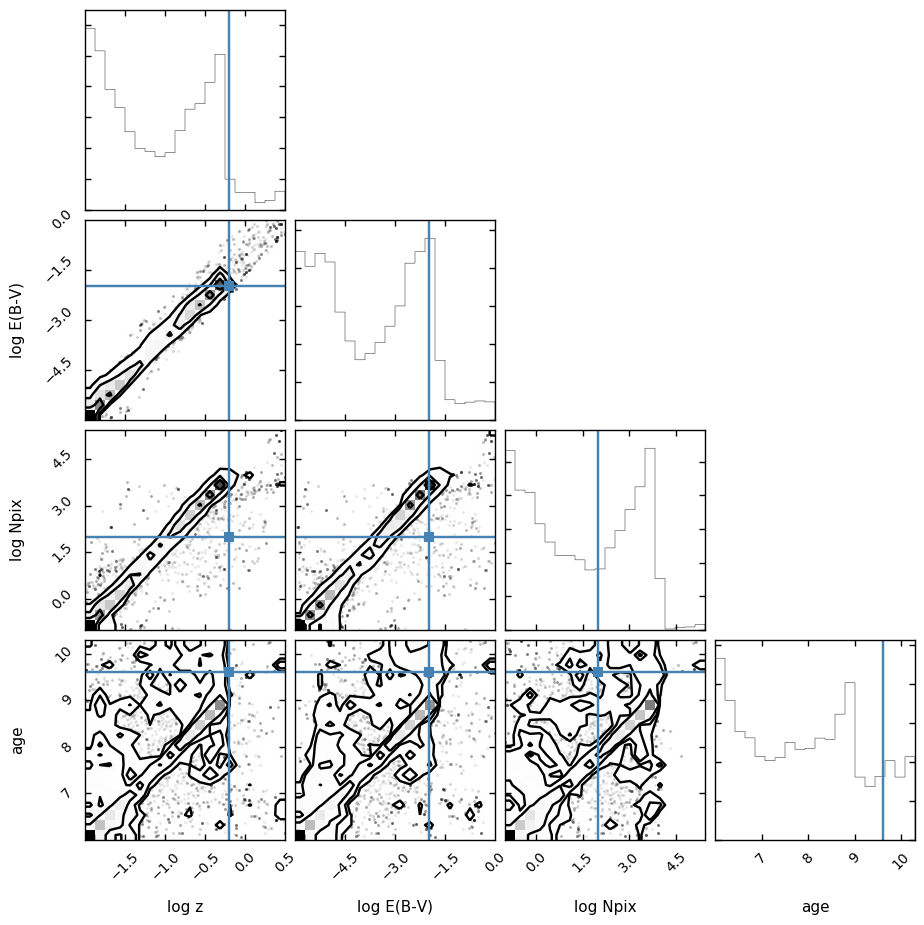

In [39]:
a = corner.corner(params, labels=['log z', 'log E(B-V)', 'log Npix', 'age'], truths=[-0.2, -2., 2., 9.6])